# Simple Linear Regression
### Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/adit-0132/machine-learning-practice/refs/heads/main/datasets/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


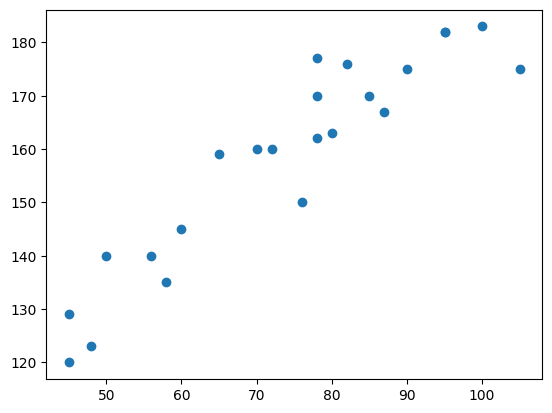

In [ ]:
# check relations visually
plt.scatter(df['Weight'],df['Height'])

In [ ]:
## correlations
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


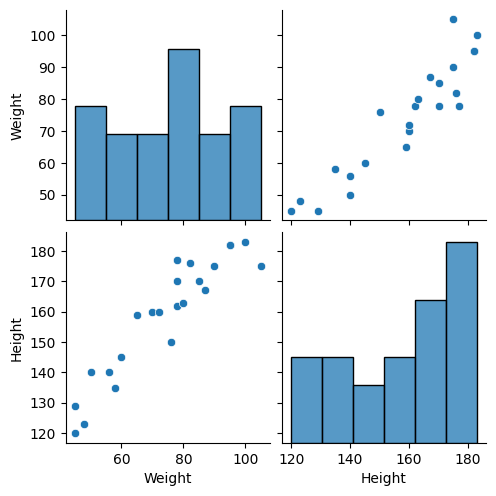

In [ ]:
# seaborn visualisation check
sns.pairplot(df)

In [ ]:
## independent vs dependent features
X=df[['Weight']] #better to have this as dataframe/2d-array
y=df['Height'] # can have this as series

In [ ]:
X,y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
X_train.shape,y_train.shape

((17, 1), (17,))

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

### Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #n_jobs=-1 -> use all processors

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Coefficient :",lr.coef_)
print("Intercept :",lr.intercept_)

Coefficient : [17.77831941]
Intercept : 158.0


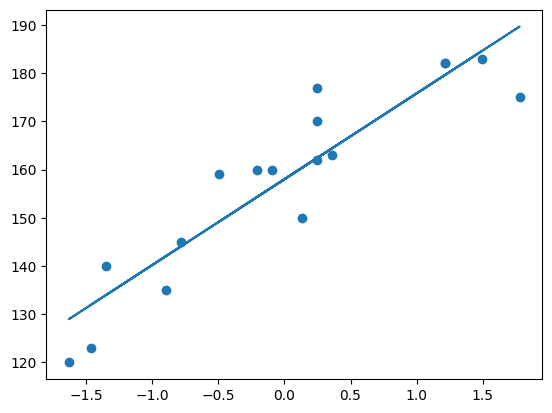

In [ ]:
# plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

### Predictions for Test Data


1.   predicted height =  intercept + coef (weight)
2.   y_pred =  158.0 +17.77831941(X_test)



In [ ]:
## Prediction for test data
y_pred=lr.predict(X_test)

In [ ]:
## Performance Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
print ("MSE : ",mse)
print ("RMSE : ",rmse)
print ("MAE : ",mae)
print ("R2 : ",r2)

MSE :  18.79109188933781
RMSE :  4.334869304758542
MAE :  2.54638798034559
R2 :  0.9433292026458774


### OLS Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction =  model.predict(X_test)
print (prediction)

[ 11.42416775   8.38962319 -29.03642636 -17.90976298  16.48174201
  13.44719746]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2021
Date:                Tue, 27 Jan 2026   Prob (F-statistic):                       0.659
Time:                        07:37:59   Log-Likelihood:                         -110.21
No. Observations:                  17   AIC:                                      222.4
Df Residuals:                      16   BIC:                                      223.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction for new data

In [ ]:
## De-standardization
lr.predict(sc.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.27447466])

# Multiple Linear Regression

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/adit-0132/machine-learning-practice/refs/heads/main/datasets/economic_index.csv')
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# drop unneccessary columns
data.drop(columns=["Unnamed: 0","year","month"],axis=0,inplace=True)

In [ ]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
#null check
data.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


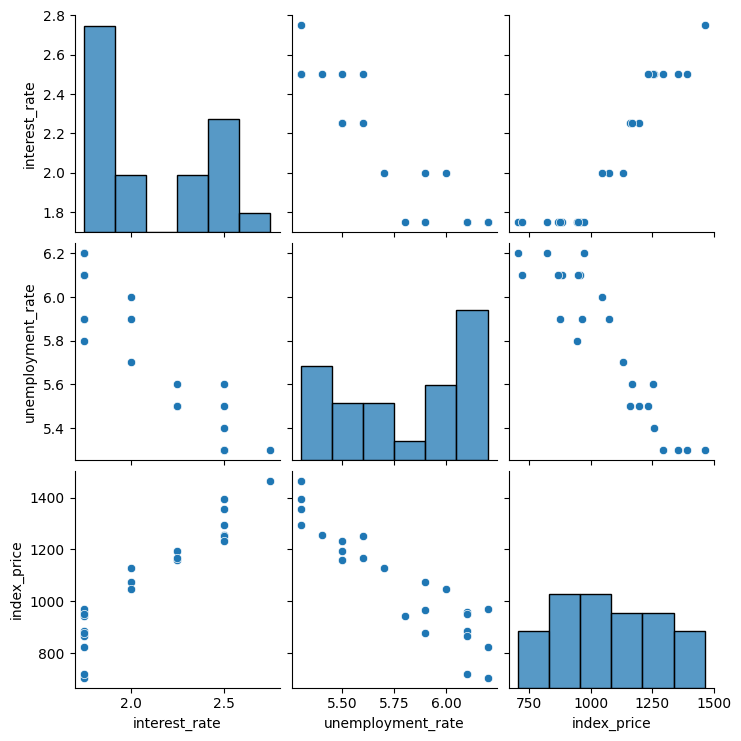

In [ ]:
# visual checks
sns.pairplot(data)

In [ ]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


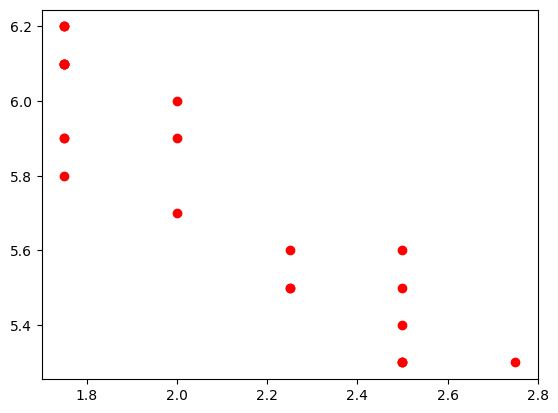

In [ ]:
plt.scatter(data['interest_rate'],data['unemployment_rate'],color='r')

### Independent and dependent features

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

#### Reg plot

<Axes: xlabel='interest_rate', ylabel='index_price'>

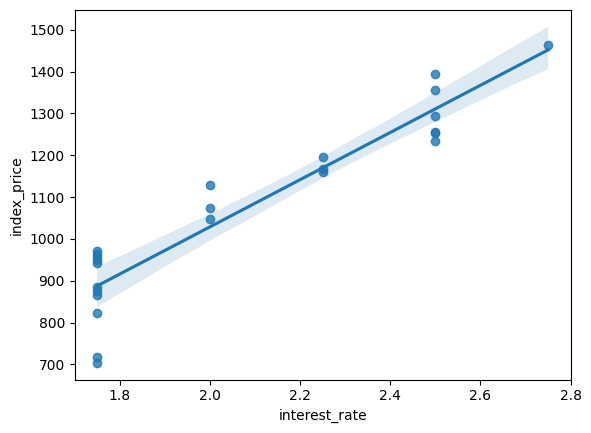

In [ ]:
sns.regplot(x='interest_rate',y='index_price',data=data)

<Axes: xlabel='interest_rate', ylabel='index_price'>

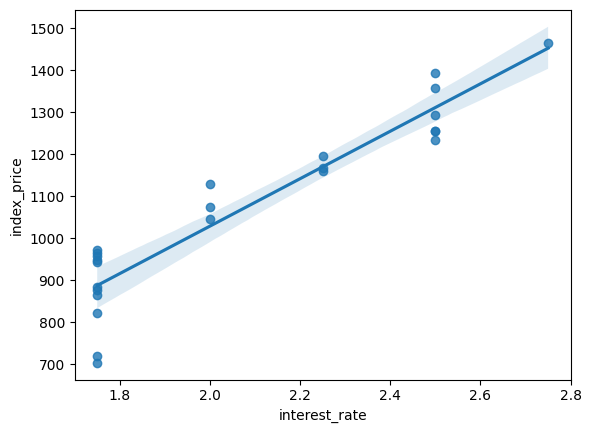

In [ ]:
sns.regplot(x='interest_rate',y='index_price',data=data)

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#cross validation scoring
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
validation_score

array([ -2031.61343288,  -9942.68562705,  -7249.4776394 , -12010.35523226,
        -4736.56961215])

In [ ]:
np.mean(validation_score)

np.float64(-7194.140308745997)

In [ ]:
## Test prediction
y_pred=lr.predict(X_test)

In [ ]:
## Performance Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
print ("MSE : ",mse)
print ("RMSE : ",rmse)
print ("MAE : ",mae)
print ("R2 : ",r2)

MSE :  1503.6018020432432
RMSE :  38.77630464656532
MAE :  29.802921268920443
R2 :  0.9277165680399801


### Assumptions

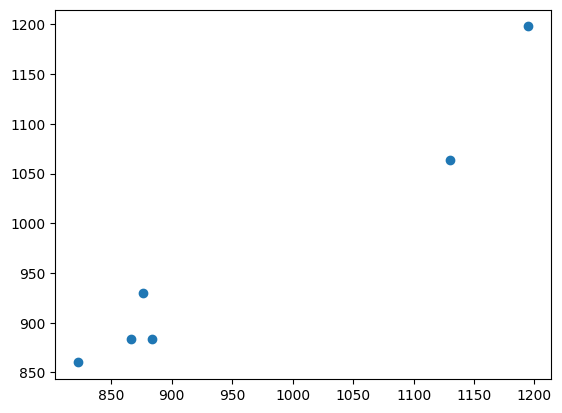

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals =  y_test-y_pred
print (residuals)

19   -17.257224
10    66.256387
21   -38.073915
18     0.742776
7     -2.863383
20   -53.623842
Name: index_price, dtype: float64


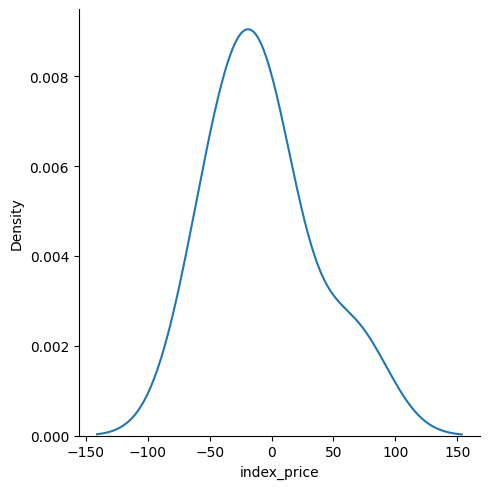

In [ ]:
## residuals plot
sns.displot(residuals,kind='kde')

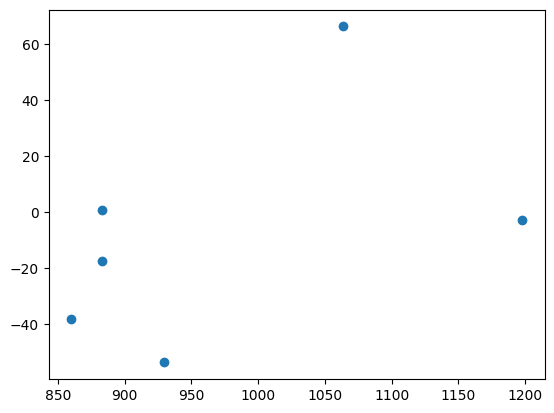

In [ ]:
## scatter plot wrt residuals and predictions
plt.scatter(y_pred,residuals)

### OLS TIME


In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction =  model.predict(X_test)
print (prediction)

[-222.79833141  -42.31194293 -245.98164057 -222.79833141   91.80782724
 -176.43171309]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.090
Method:                 Least Squares   F-statistic:                             0.2559
Date:                Tue, 27 Jan 2026   Prob (F-statistic):                       0.777
Time:                        08:08:25   Log-Likelihood:                         -151.73
No. Observations:                  18   AIC:                                      307.5
Df Residuals:                      16   BIC:                                      309.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y dataset')

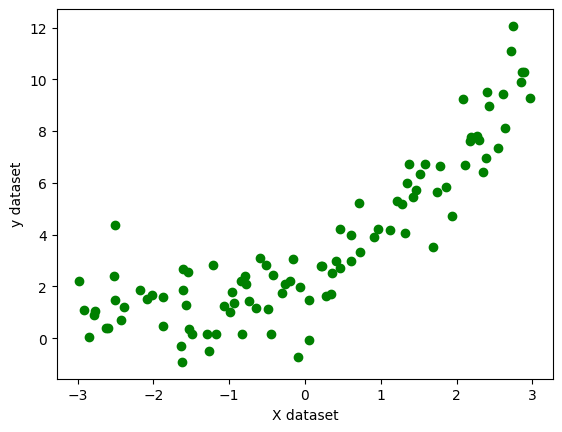

In [ ]:
X = 6*np.random.rand(100,1)-3
y = 0.5*X**2 + 1.5*X + 2 + np.random.randn(100,1) #outlier
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#implementing linear regression
from sklearn.linear_model import LinearRegression
regression =  LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
r2score =  r2_score(y_test,regression.predict(X_test))
print (r2score)

0.828807042139267


Text(0, 0.5, 'y dataset')

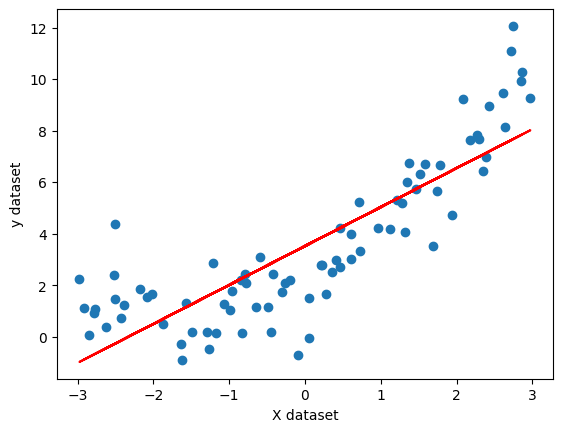

In [ ]:
# Visualization
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [ ]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly[::5]

array([[ 1.        ,  2.17278654,  4.72100135],
       [ 1.        , -1.57181598,  2.47060547],
       [ 1.        ,  1.34061362,  1.79724488],
       [ 1.        ,  0.40895003,  0.16724013],
       [ 1.        ,  2.63841021,  6.96120844],
       [ 1.        , -2.97550528,  8.85363165],
       [ 1.        , -1.06977463,  1.14441776],
       [ 1.        ,  2.42528776,  5.88202074],
       [ 1.        , -0.78134415,  0.61049869],
       [ 1.        ,  1.7793274 ,  3.166006  ],
       [ 1.        , -0.98788172,  0.97591029],
       [ 1.        ,  1.21949253,  1.48716204],
       [ 1.        , -0.25992479,  0.06756089],
       [ 1.        ,  1.51539065,  2.29640882],
       [ 1.        ,  1.31582918,  1.73140643],
       [ 1.        , -2.76881424,  7.66633231]])

In [ ]:
# retrain regression model with polynomial data
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print (score)

0.9002819640873683


In [ ]:
print (regression.coef_,regression.intercept_)

[[0.         1.50977415 0.45240053]] [2.14960807]


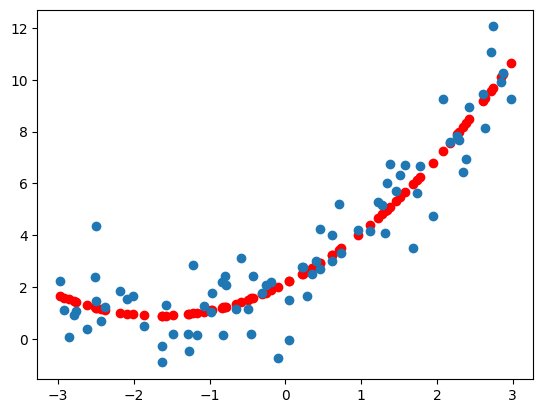

In [ ]:
plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)

### Testing out with degree =3

In [ ]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly[::5]

array([[ 1.00000000e+00,  2.17278654e+00,  4.72100135e+00,
         1.02577282e+01],
       [ 1.00000000e+00, -1.57181598e+00,  2.47060547e+00,
        -3.88333714e+00],
       [ 1.00000000e+00,  1.34061362e+00,  1.79724488e+00,
         2.40941098e+00],
       [ 1.00000000e+00,  4.08950034e-01,  1.67240130e-01,
         6.83928569e-02],
       [ 1.00000000e+00,  2.63841021e+00,  6.96120844e+00,
         1.83665234e+01],
       [ 1.00000000e+00, -2.97550528e+00,  8.85363165e+00,
        -2.63440277e+01],
       [ 1.00000000e+00, -1.06977463e+00,  1.14441776e+00,
        -1.22426909e+00],
       [ 1.00000000e+00,  2.42528776e+00,  5.88202074e+00,
         1.42655929e+01],
       [ 1.00000000e+00, -7.81344155e-01,  6.10498689e-01,
        -4.77009582e-01],
       [ 1.00000000e+00,  1.77932740e+00,  3.16600600e+00,
         5.63336122e+00],
       [ 1.00000000e+00, -9.87881717e-01,  9.75910286e-01,
        -9.64083929e-01],
       [ 1.00000000e+00,  1.21949253e+00,  1.48716204e+00,
      

In [ ]:
# retrain regression model with polynomial data
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print (score)

0.8969438075306658


In [ ]:
print (regression.coef_,regression.intercept_)

[[ 0.          1.55855329  0.45179218 -0.00864287]] [2.15083303]


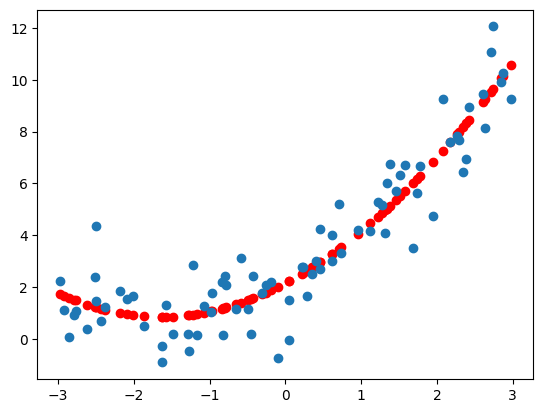

In [ ]:
plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)

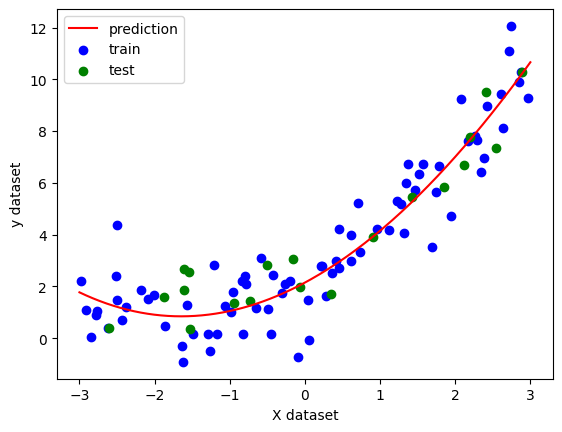

In [ ]:
# Prediction on new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='r',label='prediction')
plt.scatter(X_train,y_train,color='b',label='train')
plt.scatter(X_test,y_test,color='g',label='test')
#plt.plot(X_train,y_train,'b',label='train')
#plt.plot(X_test,y_test,'g',label='test')
plt.legend()
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()

 # Pipelines in sklearn

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
  X_new = np.linspace(-3,3,200).reshape(200,1)

  poly = PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg = LinearRegression()
  polyreg = Pipeline([
      ('poly',poly),
      ('lin_reg',lin_reg)
  ])
  polyreg.fit(X_train,y_train)
  y_pred_new = polyreg.predict(X_new)

  #plotting predictions
  plt.plot(X_new,y_pred_new,color='r',label="degree : "+str(degree),linewidth=2)
  plt.scatter(X_train,y_train,color='g',linewidth=1)
  plt.scatter(X_test,y_test,color='b',linewidth=1)
  plt.legend(loc='upper left')
  plt.xlabel('X dataset')
  plt.ylabel('y dataset')
  plt.axis([-3,3,-10,10])
  plt.show()

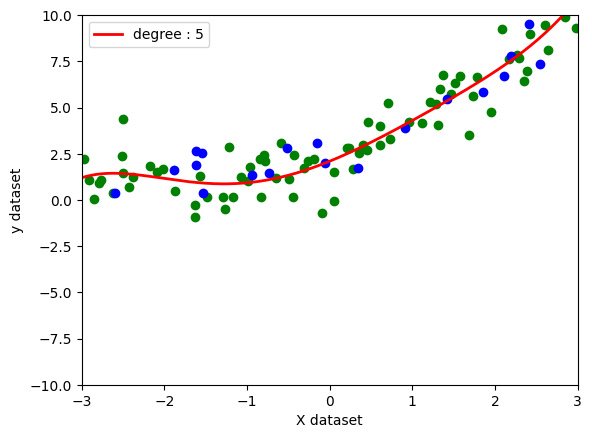

In [ ]:
poly_regression(5)